## Assignment – Build a classifier for detecting Mines and Determine Influence of k in K‑Nearest Neighbours on the UCI Sonar Dataset

 There are two classes - mine "M" (positive class, label 1) and rock "R" (negative class, label 0)

**Learning goals**

-- Detect and reason about class imbalance.

-- Evaluate two -values (3 and 5) for K‑NN using proper cross‑validation.

-- Compare accuracy to class‑sensitive metrics (precision, recall, F1).

-- Practise writing result tables and interpreting trade‑offs.

-- (Extension) Experiment with a third classifier of your choice.

**Load dataset**
use the following command to convert the string labels into categorical
```
y = df['Label'].astype('category').cat.codes
```
**Part 1  Exploratory Check**

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



**Part 2  Modelling**

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”

**Part 3  Interpretation Questions**

Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

Q3: k = 3 vs k=5 – Compare validation vs test results. Which k generalises better?

Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

**Part 4  Extension (Open‑Ended)**

- Pick one additional classifier such as SVC:

- Evaluate it with the same pipeline and metrics (include precision/recall/F1).

- Add a new row to the results table.

- State whether it improves over KNN and why that might be.


Note: Precision, recall, F1 scores can be returned for both the classes. For the assignment we stick to the single-scalar version focused on mines. For precision, recall calculate with respect to the positive class denoted by class label 1. Note the variables denoting the test splits can change based on what you have used.

```
prec = precision_score(y_te, y_pred, pos_label=1)
rec  = recall_score(y_te, y_pred, pos_label=1)
f1   = f1_score(y_te, y_pred, pos_label=1)
```

## Part 1  Exploratory Check

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



In [370]:
import pandas as pd
df = pd.read_csv("sonar.all-data.csv")
df

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [371]:
print("Missing values per column:")
print(df.isnull().sum())
print("All NaN Values:", df.isna().sum().sum()) 

Missing values per column:
Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64
All NaN Values: 0


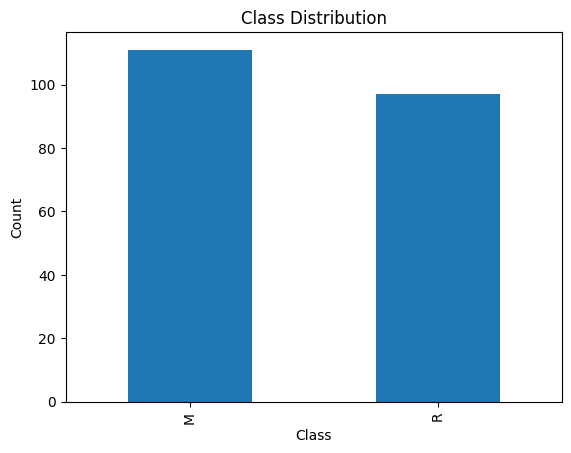

Imbalance Ratio: 1.14


In [372]:
import matplotlib.pyplot as plt
label_map = {"R": 0, "M": 1}
y = df["Label"].map(label_map)
# Display bar plot of R vs M counts
df['Label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate imbalance ratio
class_counts = y.value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


This imbalance ratio is somewhat even. Although there is more data on mines than rocks, it is not heavily skewed like an imbalance ratio of 1.5. Thus, we would not stratify the training data.


## Part 2  Modelling

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”


In [373]:
import sklearn.model_selection

# 80/20 train-test split
X = df.drop("Label", axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=42)

### Standard Scalar KNN
As the imbalance ratio isn't too high, I decided to use a standard scalar KNN. Had the imbalance ratio been 1.5 or greater, I would have used a stratifiedKFold instead.

In [374]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, kf):
    train_accs = []
    val_accs = []

    # Cross-validation loop
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_tr_scaled, y_tr)

        train_preds = model.predict(X_tr_scaled)
        val_preds = model.predict(X_val_scaled)

        train_accs.append(accuracy_score(y_tr, train_preds))
        val_accs.append(accuracy_score(y_val, val_preds))

    mean_train_acc = np.mean(train_accs)
    mean_val_acc = np.mean(val_accs)
    gap = mean_train_acc - mean_val_acc

    # Retrain on full training set → evaluate on test set
    scaler_full = StandardScaler()
    X_train_scaled = scaler_full.fit_transform(X_train)
    X_test_scaled = scaler_full.transform(X_test)

    model.fit(X_train_scaled, y_train)
    test_preds = model.predict(X_test_scaled)

    test_acc = accuracy_score(y_test, test_preds)
    prec = precision_score(y_test, test_preds, pos_label=1)
    rec = recall_score(y_test, test_preds, pos_label=1)
    f1 = f1_score(y_test, test_preds, pos_label=1)
    conf_mat = confusion_matrix(y_test, test_preds)

    return {
        "Train Acc": round(mean_train_acc, 4),
        "Val Acc": round(mean_val_acc, 4),
        "Gap": round(gap, 4),
        "Test Acc": round(test_acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "Confusion Matrix": conf_mat,
    }


In [375]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# KNN k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_result = evaluate_model(knn3, X_train, X_test, y_train, y_test, kf)

# KNN k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5_result = evaluate_model(knn5, X_train, X_test, y_train, y_test, kf)


In [376]:
import pandas as pd

# Initialize an empty dataframe to hold results
results_df = pd.DataFrame(columns=[
    "Model", "Train Acc", "Val Acc", "Gap", "Test Acc", "Precision", "Recall", "F1", "Confusion Matrix"
])

# Function to append a result row to the dataframe
def add_result_row(results_df, model_name, result):
    cm = result["Confusion Matrix"]
    row = {
        "Model": model_name,
        "Train Acc": result["Train Acc"],
        "Val Acc": result["Val Acc"],
        "Gap": result["Gap"],
        "Test Acc": result["Test Acc"],
        "Precision": result["Precision"],
        "Recall": result["Recall"],
        "F1": result["F1"],
        "Confusion Matrix": cm.tolist(),
    }
    return pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
results_df = add_result_row(results_df, "KNN-3", knn3_result)
results_df = add_result_row(results_df, "KNN-5", knn5_result)

print('Confusion matrix: [["TN", "FP"], ["FN", "TP"]]')
results_df


Confusion matrix: [["TN", "FP"], ["FN", "TP"]]


/tmp/ipykernel_6727/414590339.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)


,Model,Train Acc,Val Acc,Gap,Test Acc,Precision,Recall,F1,Confusion Matrix
0,KNN-3,0.9247,0.7950,0.1297,0.9524,1.0000,0.9231,0.96,"[[16, 0], [2, 24]]"
1,KNN-5,0.8855,0.7765,0.1091,0.9048,0.9583,0.8846,0.92,"[[15, 1], [3, 23]]"



# Part 3  Interpretation Questions

### Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

My imbalance ratio is around 1.14, meaning one class has 14% more samples than the other. I believe this is not a strong enough imbalance to distort training, so a regular KFold was still acceptable without using a Stratified KFold.

### Q3: k=3 vs k=5 – Compare validation vs test results. Which k generalises better?

The testing and training accuracy is better with k=3 than k=5. We can also check that the mean training and validation accuracy is greater, which is what the gap represents.

### Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

There are more false negatives in both k=3 and k=5, which means there is a low recall. Essentially we can interpret our model in 2 ways:
 1. **Recall**: The model is good at catching mines and not missing any mines. 
 2. **Precision**: The model is poor at checking mines that were actually rocks.

For mine detection, it is better that we have a **high recall** than a high precision. It is better that we catch mines, even if we mistaken mines for rocks, than if we mistaken a rock for a mine. 

Fortunately, 3 folds is still better in recall as well, so we will choose a k=3 model for the relevance of detecting more mines. 

# Part 4  Extension (Open‑Ended)
## Using SVC

In [377]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)


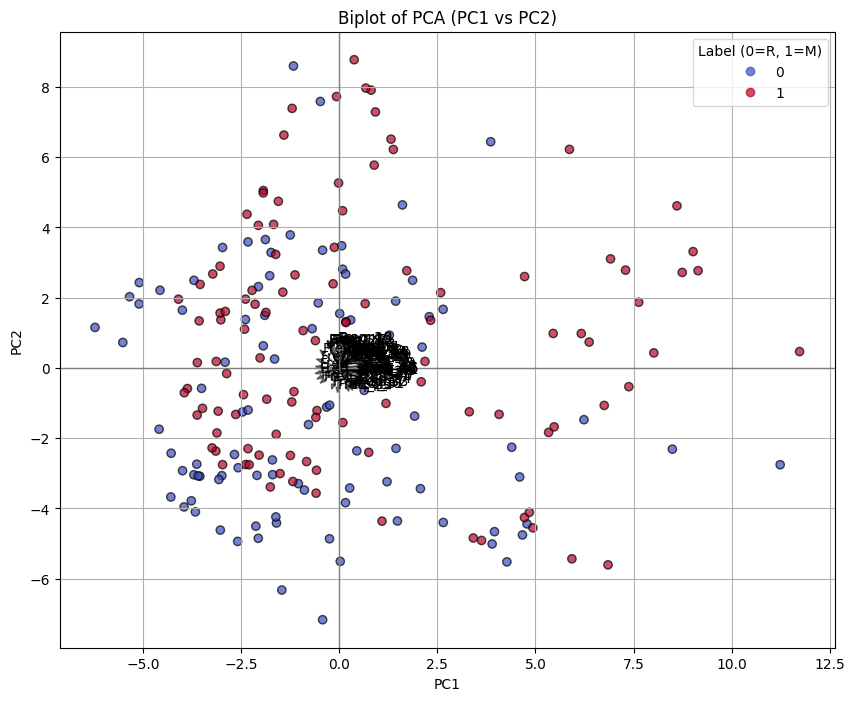

In [378]:
def biplot(score, coeff, labels=None, target=None, title='PCA Biplot'):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    plt.figure(figsize=(10, 8))
    
    # Plot the PCA scores (scatter of projected data)
    scatter = plt.scatter(xs, ys, c=target, cmap='coolwarm', edgecolor='k', alpha=0.7)
    
    # Plot the feature vectors (loadings)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0] * 3, coeff[i, 1] * 3,
                  color='black', alpha=0.5, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, f"Var{i+1}", color='black')
        else:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, labels[i], color='black')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.grid()
    plt.legend(*scatter.legend_elements(), title="Label (0=R, 1=M)")
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.show()
biplot(
    score=pca_data,
    coeff=pca.components_.T,
    labels=X.columns,
    target=y,
    title="Biplot of PCA (PC1 vs PC2)"
)

Seeing through the biplot that the data does not seem linearly separable, I will try to use a RBF kernel to try and transform the feature space for linear separable data. 

In [379]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


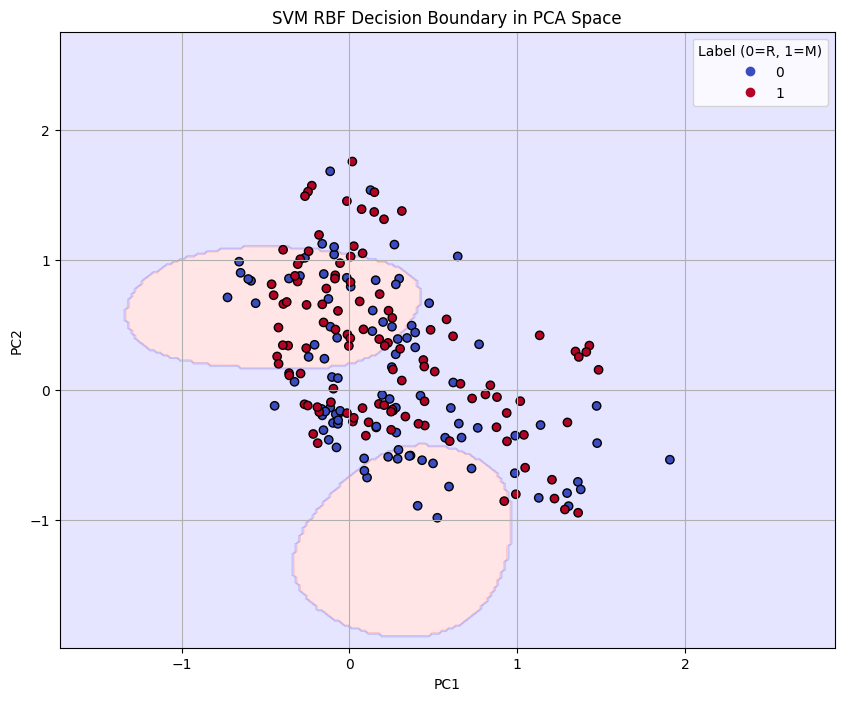

In [380]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Project X_train and X_test into PCA 2D space
X_pca = pca.transform(X)

# Split into train/test again (optional - or just plot full data)
X_pca_train = X_pca[:len(X_train)]
X_pca_test  = X_pca[len(X_train):]

# Train an SVM on PCA 2D data (here RBF kernel)
svm_pca_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pca_model.fit(X_pca_train, y_train)

# Plot decision boundary
def plot_pca_svm_decision_boundary(model, X_pca, y, title):
    h = 0.02  # step size in mesh

    # Create meshgrid
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    
    # Scatter the actual points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Label (0=R, 1=M)")
    plt.grid(True)
    plt.show()

# Now run the plot
plot_pca_svm_decision_boundary(svm_pca_model, X_pca, y, "SVM RBF Decision Boundary in PCA Space")


In [381]:
svm_result = evaluate_model(svm_model, X_train, X_test, y_train, y_test, kf)
svm_pca_result = evaluate_model(svm_pca_model, X_train, X_test, y_train, y_test, kf)
results_df = add_result_row(results_df, "SVC-RBF", svm_result)
results_df = add_result_row(results_df, "SVC-RBF-PCA", svm_pca_result)
results_df


,Model,Train Acc,Val Acc,Gap,Test Acc,Precision,Recall,F1,Confusion Matrix
0,KNN-3,0.9247,0.7950,0.1297,0.9524,1.0000,0.9231,0.960,"[[16, 0], [2, 24]]"
1,KNN-5,0.8855,0.7765,0.1091,0.9048,0.9583,0.8846,0.920,"[[15, 1], [3, 23]]"
2,SVC-RBF,0.9864,0.8191,0.1674,0.8810,0.9565,0.8462,0.898,"[[15, 1], [4, 22]]"
3,SVC-RBF-PCA,0.9864,0.8191,0.1674,0.8810,0.9565,0.8462,0.898,"[[15, 1], [4, 22]]"


Conclusion:

In this experiment, SVM did not improve over KNN. Although the training and validation accuracy is higher than the KNN, the test accuracy is much lower. This could present some signs of overfitting in the model.

Some reasons why the SVC performed worse is because the decision boundary was not linear enough. It assumes there must be a linear relationship across all features. Granted, the SVC didn't do too poorly from the KNNs in the test accuracy. We can also recognize the KNN does better with more features as a non-parametric model. 

Again, we would like to prioritize the model with **high recall**. We would want to continue using KNN with 3 folds.